# DeepInsight for Gene-Expression

In [1]:
import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

from PIL import Image
from sklearn.preprocessing import StandardScaler, MinMaxScaler


import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "/Volumes/Buffalo-SSD/Kaggle_Datasets/gene-expression/"

In [3]:
os.listdir(path)

['._actual.csv',
 'actual.csv',
 'data_set_ALL_AML_independent.csv',
 '._data_set_ALL_AML_independent.csv',
 'data_set_ALL_AML_train.csv',
 '._data_set_ALL_AML_train.csv']

In [4]:
train = pd.read_csv(path+'data_set_ALL_AML_train.csv')
test = pd.read_csv(path+'data_set_ALL_AML_independent.csv')
actual = pd.read_csv(path+'actual.csv')

# 処理


In [5]:
def process1(df, actural, target):
    df1 = [col for col in df.columns if "call" not in col]
    df = df[df1]
    df = df.T
    df2 = df.drop(['Gene Description','Gene Accession Number'],axis=0)
    df2.index = pd.to_numeric(df2.index)
    df2.sort_index(inplace=True)
    if target == 'train':
        df2['cat'] = list(actual[:38]['cancer'])
    elif target == 'test':
        df2['cat'] = list(actual[38:]['cancer'])
    dic = {'ALL':0,'AML':1}
    df2.replace(dic,inplace=True)
    return df, df2

In [6]:
%time
train_df, train_df2 = process1(train, actual, 'train')
test_df, test_df2 = process1(test, actual, 'test')

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs


# 1st 次元削減

In [7]:
ALL_index = train_df2[train_df2['cat'] == 0].index - 1
AML_index = train_df2[train_df2['cat'] == 1].index - 1

In [8]:
y = train_df2['cat'].values
test_y = test_df2['cat'].values

train_df3 = train_df2.drop('cat', axis=1)
test_df3 = test_df2.drop('cat', axis=1)

sd = StandardScaler()
sd.fit(train_df3.T)
train_sd = sd.transform(train_df3.T)

# DeepInsight

In [30]:
import DeepInsight

In [31]:
deepinsight = DeepInsight.DeepInsight()

In [32]:
%%time
train_images = deepinsight.fit(train_df3)

CPU times: user 6.13 s, sys: 354 ms, total: 6.49 s
Wall time: 4.57 s


In [33]:
%%time
test_images = deepinsight.predict(test_df3)

CPU times: user 2.73 s, sys: 7.4 ms, total: 2.73 s
Wall time: 2.74 s


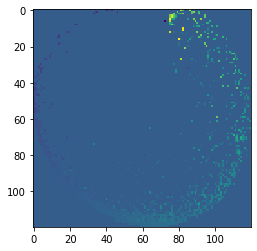

In [37]:
plt.imshow(train_images[10])
plt.show()

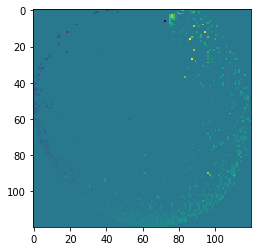

In [39]:
plt.imshow(test_images[10])
plt.show()

1.0